In [1454]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1455]:
dataset=pd.read_csv('movie_metadata.csv')

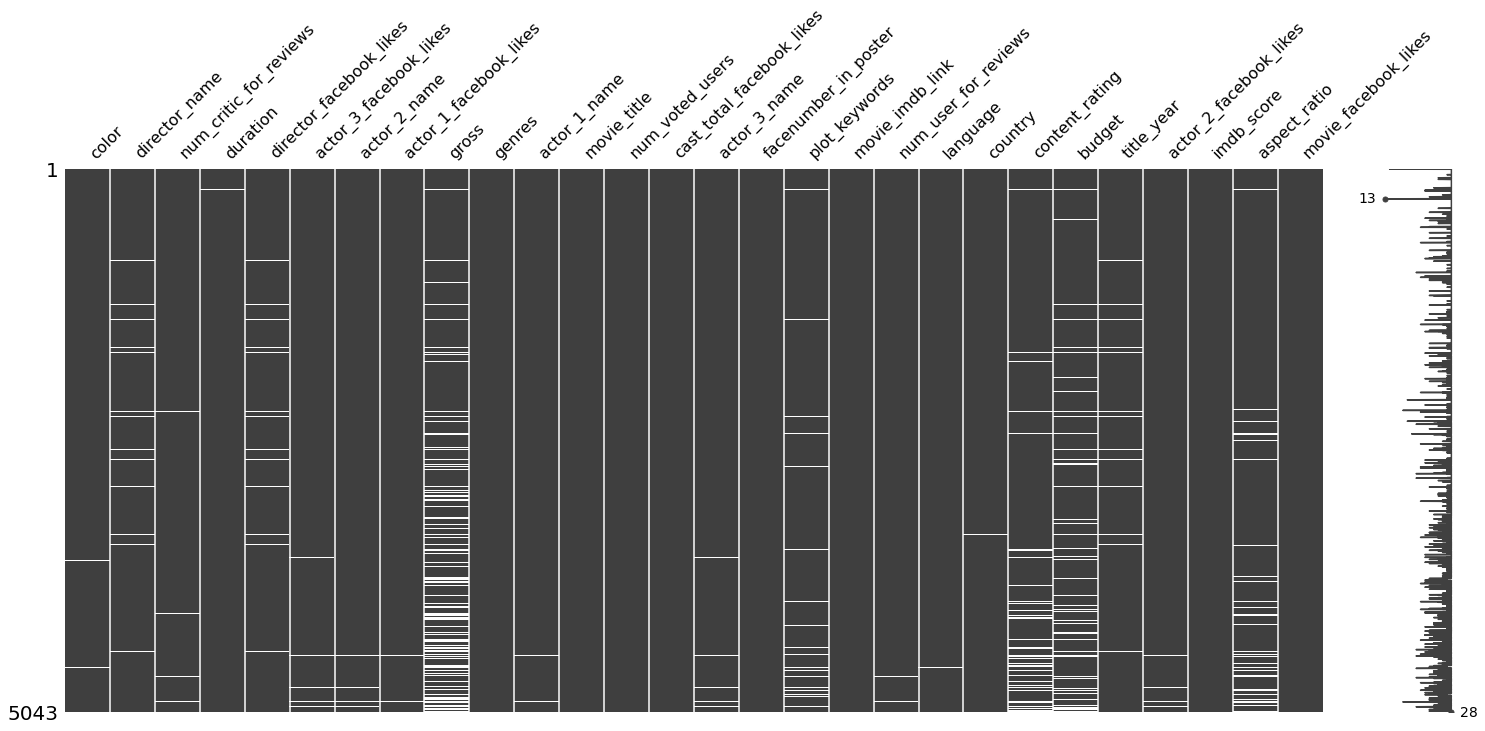

In [1456]:
import missingno
missingno.matrix(dataset)

In [1457]:
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [1458]:
dataset.dtypes
lis=['color','actor_1_name','director_name','language','country','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name','movie_imdb_link','actor_2_facebook_likes','movie_facebook_likes']
dataset.drop(lis,inplace=True,axis=1)

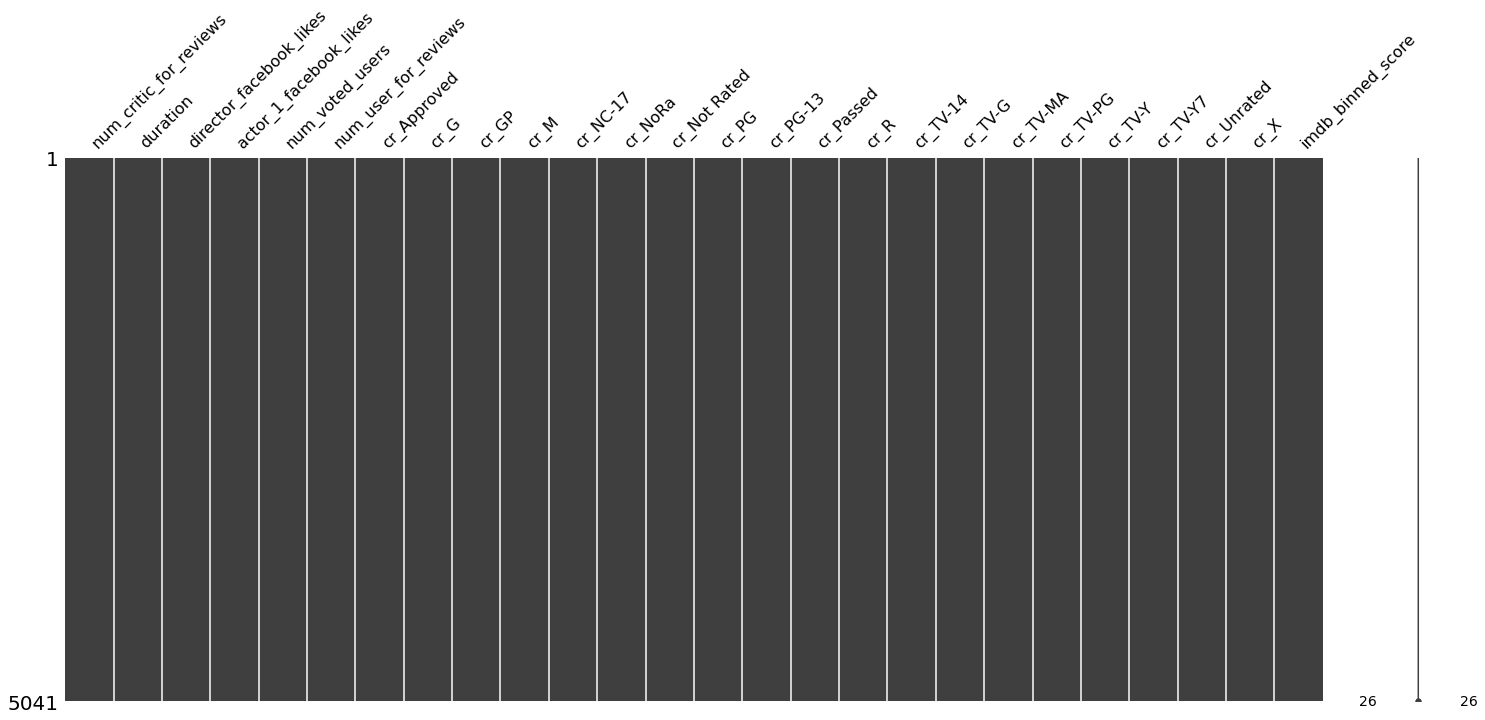

In [1493]:
missingno.matrix(dataset)

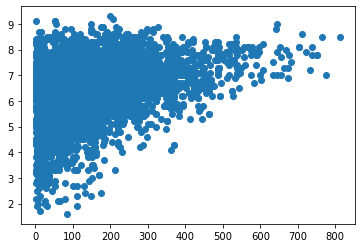

In [1460]:
plt.scatter(dataset['num_critic_for_reviews'],dataset['imdb_score'])

In [1461]:
dataset['duration'].fillna(dataset['duration'].mean(),inplace=True)

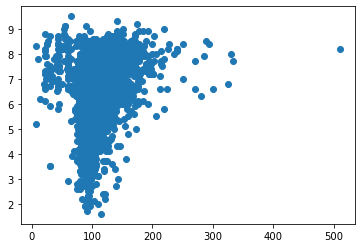

In [1462]:
plt.scatter(dataset['duration'],dataset['imdb_score'])

In [1463]:
dataset['num_critic_for_reviews'].fillna(dataset['num_critic_for_reviews'].mean(),inplace=True)


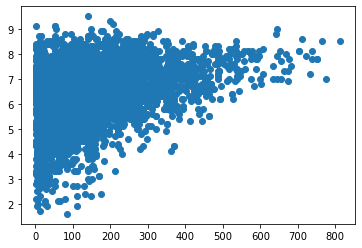

In [1464]:
plt.scatter(dataset['num_critic_for_reviews'],dataset['imdb_score'])

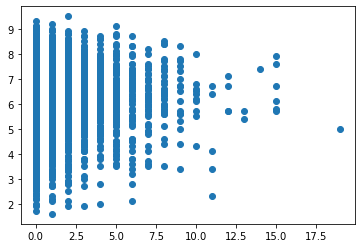

In [1465]:
#removed noisy data 
dataset.drop(dataset[dataset.facenumber_in_poster>20].index, inplace=True)
plt.scatter(dataset['facenumber_in_poster'],dataset['imdb_score'])

In [1466]:
#dropped as almost all category of face number has different almost all imdb_score
dataset.drop('facenumber_in_poster',inplace=True,axis=1)

In [1467]:
dataset['num_user_for_reviews'].fillna(dataset['num_user_for_reviews'].median(),inplace=True)

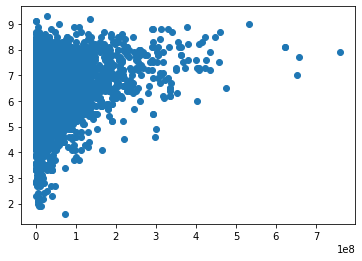

In [1468]:
plt.scatter(dataset['gross'],dataset['imdb_score'])

In [1469]:
#many null values
dataset.drop('gross',inplace=True,axis=1)

In [1470]:
dataset.drop('budget',inplace=True,axis=1)

In [1471]:
dataset['content_rating'].fillna('NoRa',inplace=True)

In [1472]:
dataset.drop(['genres'],inplace=True,axis=1)
dataset.drop(['movie_title'],inplace=True,axis=1)
dataset.drop(['title_year'],inplace=True,axis=1)
dataset.drop(['plot_keywords'],inplace=True,axis=1)
dataset.drop(['aspect_ratio'],inplace=True,axis=1)

In [1473]:
dataset['actor_1_facebook_likes'].fillna(dataset['actor_1_facebook_likes'].median(),inplace=True)
dataset['director_facebook_likes'].fillna(dataset['director_facebook_likes'].median(),inplace=True)

In [1474]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['content_rating'], prefix='cr')],axis=1)

In [1475]:
dataset.drop(['content_rating'],inplace=True,axis=1)

In [1476]:
dataset['imdb_binned_score']=pd.cut(dataset['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [1477]:
dataset.drop('imdb_score',axis=1,inplace=True)

In [1478]:
dataset.dtypes

num_critic_for_reviews     float64
duration                   float64
director_facebook_likes    float64
actor_1_facebook_likes     float64
num_voted_users              int64
num_user_for_reviews       float64
cr_Approved                  uint8
cr_G                         uint8
cr_GP                        uint8
cr_M                         uint8
cr_NC-17                     uint8
cr_NoRa                      uint8
cr_Not Rated                 uint8
cr_PG                        uint8
cr_PG-13                     uint8
cr_Passed                    uint8
cr_R                         uint8
cr_TV-14                     uint8
cr_TV-G                      uint8
cr_TV-MA                     uint8
cr_TV-PG                     uint8
cr_TV-Y                      uint8
cr_TV-Y7                     uint8
cr_Unrated                   uint8
cr_X                         uint8
imdb_binned_score            int64
dtype: object

In [1479]:
from sklearn.model_selection import train_test_split

In [1480]:
X=dataset.iloc[:,:-1].values

In [1481]:
y=dataset.iloc[:,-1].values

In [1482]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [1483]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


In [1484]:
from sklearn.neighbors import KNeighborsClassifier

In [1485]:
cnn=KNeighborsClassifier(n_neighbors=20)

In [1486]:
cnn.fit(X_train, np.ravel(y_train,order='C'))

KNeighborsClassifier(n_neighbors=20)

In [1490]:
y_pred=cnn.predict(X_test)

In [1491]:
from sklearn import metrics

In [1492]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6808721506442021
